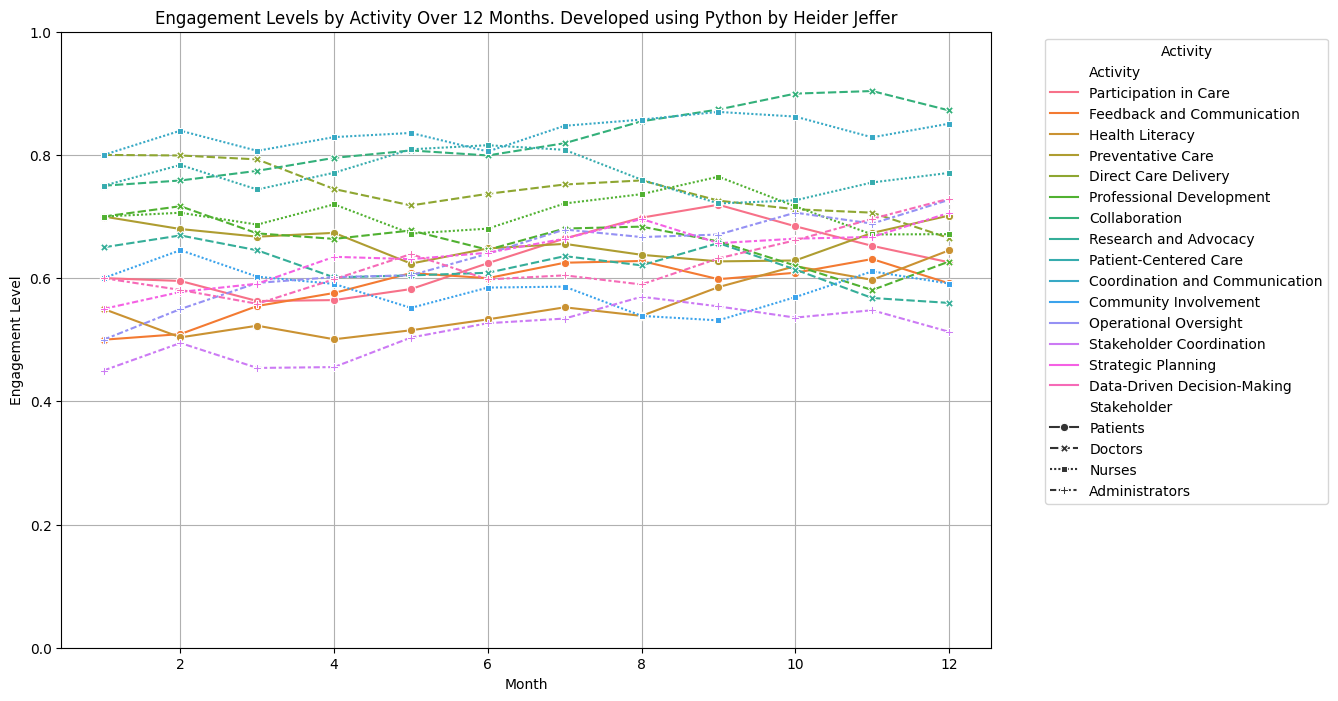

Average Engagement Levels by Stakeholder and Activity:
Stakeholder     Activity                      
Administrators  Data-Driven Decision-Making       0.623923
                Operational Oversight             0.635503
                Stakeholder Coordination          0.511651
                Strategic Planning                0.639887
Doctors         Collaboration                     0.825597
                Direct Care Delivery              0.742580
                Professional Development          0.660668
                Research and Advocacy             0.619461
Nurses          Community Involvement             0.583517
                Coordination and Communication    0.836018
                Patient-Centered Care             0.767938
                Professional Development          0.703858
Patients        Feedback and Communication        0.585853
                Health Literacy                   0.555331
                Participation in Care             0.631071
             

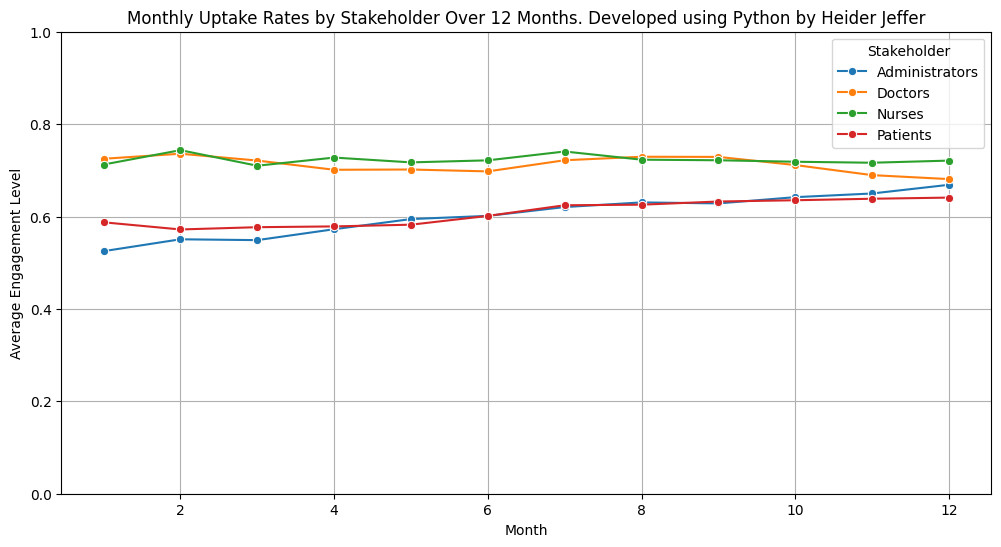


Qualitative Analysis:

Stakeholder Engagement Trends:

Patients:
  - Participation in Care: Avg Engagement = 0.63
    * Noticeable fluctuation in engagement from 0.56 to 0.72. Consider strategies to stabilize this.
  - Feedback and Communication: Avg Engagement = 0.59
    * Noticeable fluctuation in engagement from 0.50 to 0.63. Consider strategies to stabilize this.
  - Health Literacy: Avg Engagement = 0.56
    * Noticeable fluctuation in engagement from 0.50 to 0.65. Consider strategies to stabilize this.
  - Preventative Care: Avg Engagement = 0.66
    * Engagement is fairly stable for this activity.

Doctors:
  - Direct Care Delivery: Avg Engagement = 0.74
    * Noticeable fluctuation in engagement from 0.67 to 0.80. Consider strategies to stabilize this.
  - Professional Development: Avg Engagement = 0.66
    * Noticeable fluctuation in engagement from 0.58 to 0.72. Consider strategies to stabilize this.
  - Collaboration: Avg Engagement = 0.83
    * Noticeable fluctuation in en

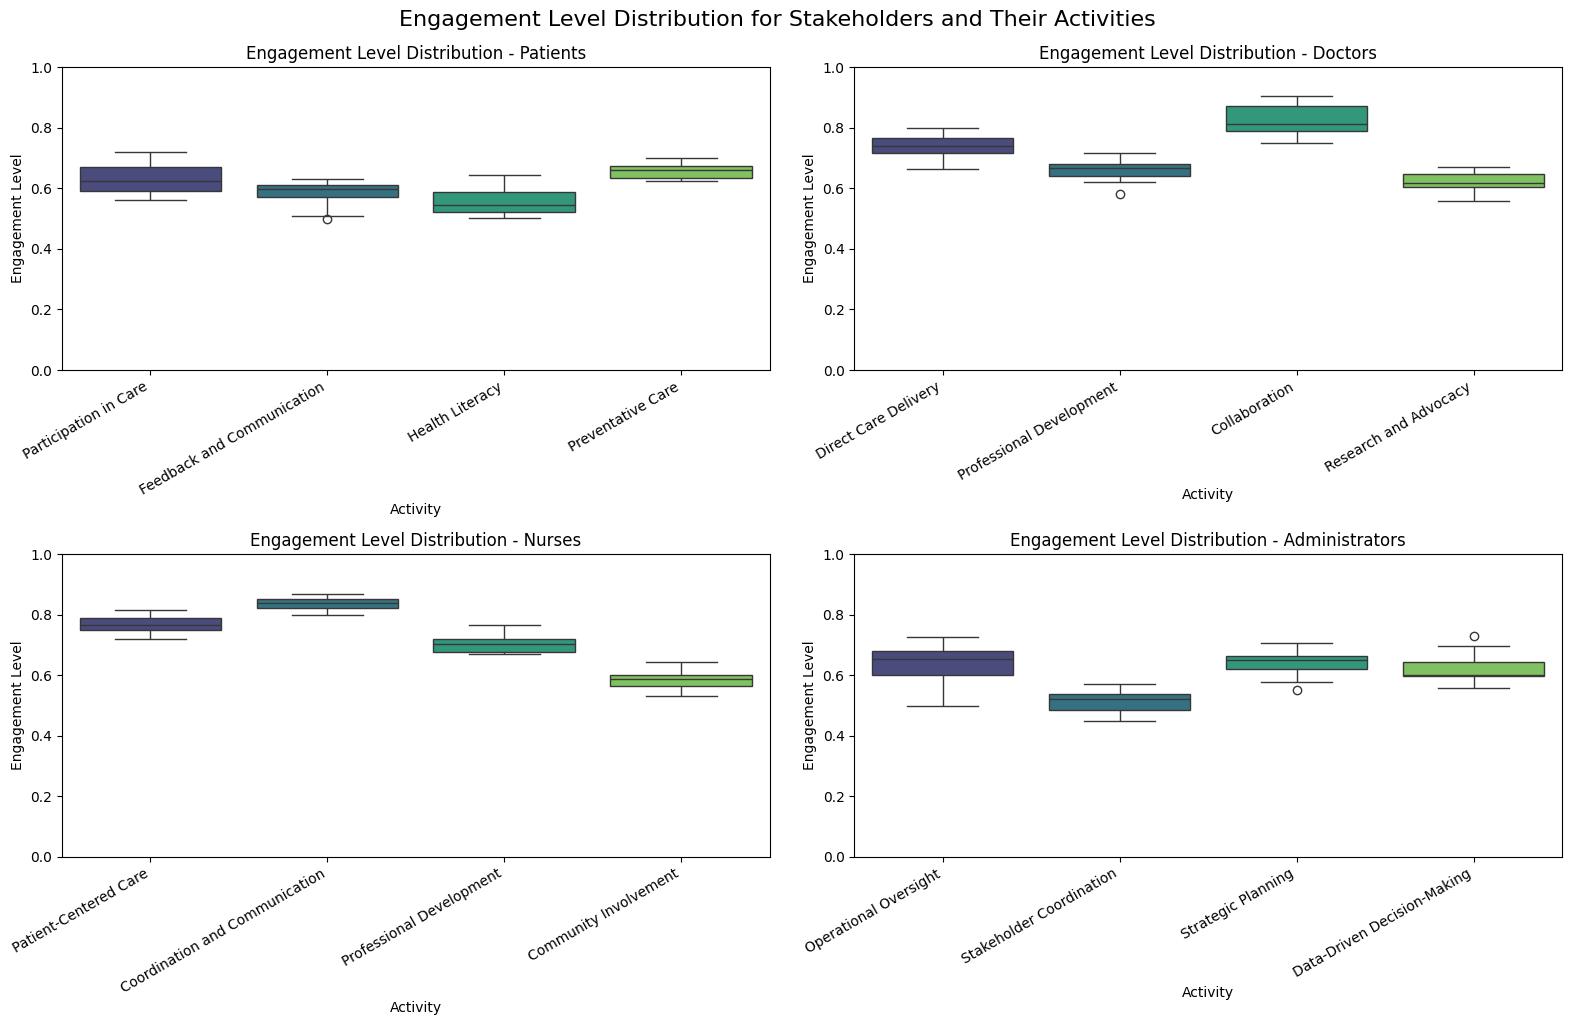

In [51]:
# Dynamic Simulation and Analysis of Stakeholder Engagement in Healthcare Quantitative and Qualitative Insights
# Developed using Python by Heider Jeffer
# The code is expandable by design. The code is cutting edge rolling release, frequently delivering updates to applications


# Part 1: Quantitative and Qualitative Analysis of Stakeholder Engagement Simulation
# Part 2: Engagement and Uptake Insights

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define stakeholders, their activities, and base engagement levels for each activity
stakeholders = {
    'Patients': {
        'activities': {
            'Participation in Care': 0.6,
            'Feedback and Communication': 0.5,
            'Health Literacy': 0.55,
            'Preventative Care': 0.7
        }
    },
    'Doctors': {
        'activities': {
            'Direct Care Delivery': 0.8,
            'Professional Development': 0.7,
            'Collaboration': 0.75,
            'Research and Advocacy': 0.65
        }
    },
    'Nurses': {
        'activities': {
            'Patient-Centered Care': 0.75,
            'Coordination and Communication': 0.8,
            'Professional Development': 0.7,
            'Community Involvement': 0.6
        }
    },
    'Administrators': {
        'activities': {
            'Operational Oversight': 0.5,
            'Stakeholder Coordination': 0.45,
            'Strategic Planning': 0.55,
            'Data-Driven Decision-Making': 0.6
        }
    }
}

# Function to simulate engagement levels for each activity over time
# Simulation Code Highlights
def simulate_activity_engagement(stakeholders, months=12, fluctuation=0.05):
    """Simulate engagement levels for each activity of all stakeholders over time."""
    # Engagement simulation logic...
    engagement_over_time = []
    for stakeholder, data in stakeholders.items():
        for activity, base_engagement in data['activities'].items():
            monthly_engagement = [base_engagement]
            for _ in range(1, months):
                # Simulate random fluctuation for each month
                change = np.random.uniform(-fluctuation, fluctuation)
                new_engagement = max(0, min(1, monthly_engagement[-1] + change))
                monthly_engagement.append(new_engagement)
            # Store results for each activity
            for month, engagement in enumerate(monthly_engagement, start=1):
                engagement_over_time.append({
                    'Stakeholder': stakeholder,
                    'Activity': activity,
                    'Month': month,
                    'Engagement': engagement
                })
    return pd.DataFrame(engagement_over_time)

# Simulate engagement levels
months = 12  # Change this value to adjust the simulation duration
df_activity_engagement = simulate_activity_engagement(stakeholders, months=months)

# Visualization of Engagement Levels by Activity
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_activity_engagement, x='Month', y='Engagement', hue='Activity', style='Stakeholder', markers=True)
plt.title(f"Engagement Levels by Activity Over {months} Months. Developed using Python by Heider Jeffer")
plt.xlabel("Month")
plt.ylabel("Engagement Level")
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Activity")
plt.grid()
plt.show()

# Analyzing Average Engagement Levels by Activity
average_engagement = df_activity_engagement.groupby(['Stakeholder', 'Activity'])['Engagement'].mean()
print("Average Engagement Levels by Stakeholder and Activity:")
print(average_engagement)

# Aggregated Uptake Rate by Stakeholder
def calculate_uptake_rate(df):
    """Calculate uptake rate as the mean engagement across all activities for each stakeholder."""
    return df.groupby('Stakeholder')['Engagement'].mean()

uptake_rates = calculate_uptake_rate(df_activity_engagement)
print("\nOverall Uptake Rate by Stakeholder:")
print(uptake_rates)

# Visualizing Uptake Rates Over Time
monthly_uptake = df_activity_engagement.groupby(['Month', 'Stakeholder'])['Engagement'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_uptake, x='Month', y='Engagement', hue='Stakeholder', marker="o")
plt.title(f"Monthly Uptake Rates by Stakeholder Over {months} Months. Developed using Python by Heider Jeffer")
plt.xlabel("Month")
plt.ylabel("Average Engagement Level")
plt.ylim(0, 1)
plt.grid()
plt.legend(title="Stakeholder")
plt.show()

# Qualitative Analysis
def qualitative_analysis(df, average_engagement, uptake_rates):
    """
    Perform a qualitative analysis to interpret the engagement trends and identify areas for improvement.
    """
    print("\nQualitative Analysis:")

    # 1. Stakeholder Engagement Trends
    print("\nStakeholder Engagement Trends:")
    for stakeholder in df['Stakeholder'].unique():
        print(f"\n{stakeholder}:")
        stakeholder_df = df[df['Stakeholder'] == stakeholder]
        for activity in stakeholder_df['Activity'].unique():
            activity_df = stakeholder_df[stakeholder_df['Activity'] == activity]
            # Access the average engagement using both stakeholder and activity
            avg_engagement = average_engagement[stakeholder, activity]
            print(f"  - {activity}: Avg Engagement = {avg_engagement:.2f}")
            max_engagement = activity_df['Engagement'].max()
            min_engagement = activity_df['Engagement'].min()
            if max_engagement - min_engagement > 0.1:
                print(f"    * Noticeable fluctuation in engagement from {min_engagement:.2f} to {max_engagement:.2f}. Consider strategies to stabilize this.")
            else:
                print(f"    * Engagement is fairly stable for this activity.")

    # 2. Stakeholder Comparison
    print("\nComparison of Stakeholder Engagement Levels:")
    for stakeholder in uptake_rates.index:
        avg_uptake = uptake_rates[stakeholder]
        if avg_uptake < 0.6:
            print(f"  - {stakeholder}: Below average uptake rate ({avg_uptake:.2f}). This suggests potential areas for further engagement or outreach.")
        else:
            print(f"  - {stakeholder}: Above average uptake rate ({avg_uptake:.2f}). This is a positive indicator of stakeholder engagement.")

    # 3. Identifying Key Activities for Improvement
    print("\nIdentifying Key Activities for Improvement:")
    for activity in average_engagement.index.get_level_values(1).unique():
        # Access the average engagement for the activity across all stakeholders
        activity_avg_engagement = average_engagement.xs(activity, level=1).mean()
        if activity_avg_engagement < 0.6:
            print(f"  - Activity: {activity} has a lower than average engagement ({activity_avg_engagement:.2f}). This might need more attention.")
        else:
            print(f"  - Activity: {activity} shows positive engagement levels ({activity_avg_engagement:.2f}).")


# Perform the qualitative analysis
qualitative_analysis(df_activity_engagement, average_engagement, uptake_rates)


# Part 2: Statistical Distribution Visualization for Stakeholders and Activities:

plt.figure(figsize=(16, 10))

# Create a subplot for each stakeholder
stakeholders_list = df_activity_engagement['Stakeholder'].unique()
for i, stakeholder in enumerate(stakeholders_list, 1):
    plt.subplot(2, 2, i)
    stakeholder_df = df_activity_engagement[df_activity_engagement['Stakeholder'] == stakeholder]

    # Create a boxplot for each activity
    sns.boxplot(data=stakeholder_df, x='Activity', y='Engagement', hue='Activity', palette="viridis", dodge=False)

    # Enhance plot appearance
    plt.title(f"Engagement Level Distribution - {stakeholder}")
    plt.xlabel("Activity")
    plt.ylabel("Engagement Level")
    plt.ylim(0, 1)
    plt.xticks(rotation=30, ha='right')

# Adjust layout
plt.tight_layout()
plt.suptitle("Engagement Level Distribution for Stakeholders and Their Activities", fontsize=16, y=1.02)
plt.show()

Qualitative Analysis of Stakeholder Engagement. Developed using Python by Heider Jeffer


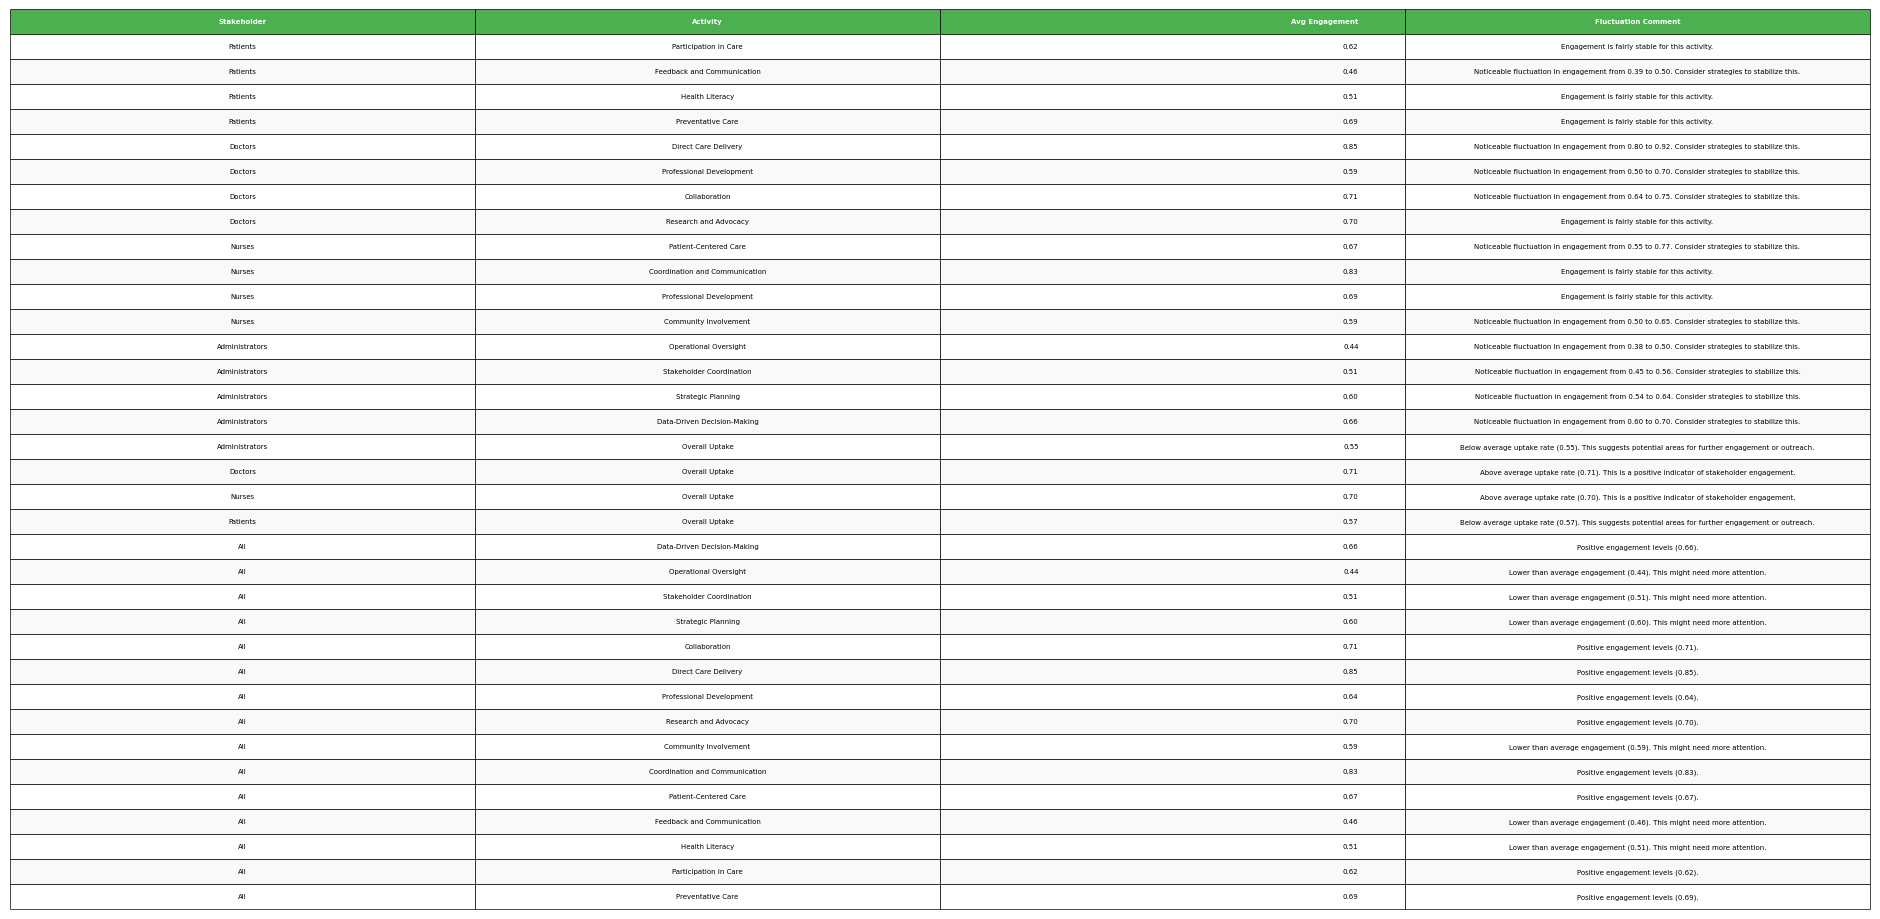

In [50]:
# Print the title in the console
print("Qualitative Analysis of Stakeholder Engagement. Developed using Python by Heider Jeffer")

# Function to display the table as a PNG image
def display_as_png(table_df):
    """Displays the qualitative analysis table as a PNG image with enhanced styling."""
    fig, ax = plt.subplots(figsize=(16, 8))  # Adjust figure size for a clean layout

    # Hide axes
    ax.axis('tight')
    ax.axis('off')

    # Create table in the plot
    table = ax.table(
        cellText=table_df.values,
        colLabels=table_df.columns,
        cellLoc='center',
        loc='center'
    )

    # Apply table styling
    # Header formatting
    for (row, col), cell in table.get_celld().items():
        if row == 0:  # Header row
            cell.set_facecolor('#4CAF50')
            cell.set_text_props(weight='bold', color='white')
            cell.set_fontsize(14)
        else:
            # Alternate row colors for better readability
            cell.set_facecolor('#f9f9f9' if row % 2 == 0 else '#ffffff')
            cell.set_fontsize(12)
        # Set borders for all cells
        cell.set_edgecolor('black')
        cell.set_linewidth(0.5)
        # Adjust alignment for numbers
        if col == 2:  # Avg Engagement column
            cell.set_text_props(ha='right')

    # Scale table size and improve layout
    table.scale(1.5, 1.5)  # Increase size for readability

    # Display the table
    plt.show()

# Display the enhanced table
display_as_png(qualitative_df)